# Explorative Datenanalyse

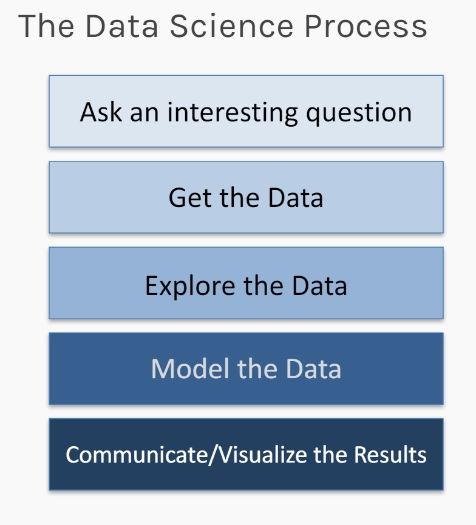

Quelle: Protopapas, Rader, Tanner, CS109 Data Science, 2020 [Link](https://github.com/Harvard-IACS/2020-CS109A/blob/master/content/lectures/lecture01/slides/Lecture1_Introduction.pdf)

Wir verfolgen wieder den Data Science Workflow, fokussieren in diesem Notebook aber auf den 3. Schritt, **Explore the Data**.

Als Datensatz nehmen wir einen Auszug der Top 1000 Filme aus der Internet Movie Database.

## Schritt 1: Ask an interesting question

## Schritt 2: Get the Data

In [1]:
import pandas as pd   # Importieren Standard-Library für das Bearbeiten und Laden von Daten ("Data Engineering").
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns   # verschönert Matplotlib-Graphiken
import numpy as np # Standard-Library für Rechnen

In [2]:
url_webpage = 'https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv' # wir speichern den Pfad für die Datei in der Variable url_webpage
IMDB_df = pd.read_csv(url_webpage, sep=',') # einzelnen Einträge in CSV sind durch , getrennt. Oft werden diese aber auch per ; getrennt

In [3]:
# Geben Sie den Namen des Dataframes an und führen Sie die Zelle aus. Damit sehen Sie, ob das Einlesen funktioniert hat
IMDB_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## Schritt 3: Explore the data

Wir schauen uns das Dataset genauer an.
Wir werden in diesem Abschnitt folgendes machen:
* deskriptive Analytics. Wie ist die Datei aufgebaut? Was steht da drinnen?
* nach Nullwerte schauen und ggf. ersetzen
* Entdecken von Ausreißern oder Anomalien
* Entdecken von Mustern


In [4]:
IMDB_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Wir schauen uns die Datentypen an, damit wir wissen, welche Variablen wir haben.Plots können wir für folgende Typen durchführen
* float64 = Reelle Zahlen
* int64 = Ganzzahlen
* Categorical

In [5]:
# Schauen Sie sich die ersten 10 Zeilen des Dataframes an 
IMDB_df.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


Wir werden in diesem Notebook keine großen Datensäuberungen machen, es geht hier mehr um die möglichen Visualisierungen. Aber zur Übersicht kurz, ob und wie viele Nullwerte wir haben.

In [6]:
IMDB_df.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

Wir sehen, wir haben 3 Nullwerte für Content_Rating, sonst keine.

Also fangen wir mit der deskriptiven Analyse an. Ein guter Einstieg ist der Befehl describe von Pandas. Wir lernen später noch eine bessere Methode kennen, die vieles für uns abdeckt (Pandas Profiling).

In [7]:
# Verwenden Sie die Methode describe mit Parameter include='all auf Ihr Dataframe
IMDB_df.describe(include='all')

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979,976,979,979.000000,979
unique,NaN,975,12,16,NaN,969
top,NaN,Dracula,R,Drama,NaN,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,NaN,2,460,278,NaN,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN


Wir können hier schon einige deskriptive Sachen ableiten (bspw. über Zeile Top, was die häufigsten Werte sind für Body-style, fuel-type, ...).

Aber Fokus dieses Notebooks sollten die Plots sein. Deshalb lassen wir die anderen Sachen der deskriptiven Analyse heraus.

Wir verwenden zum Plotten die Libraries [Matplotlib](https://matplotlib.org/) sowie [Seaborn](https://seaborn.pydata.org/index.html), eine graphische Verschönerung von Matplotlib. 

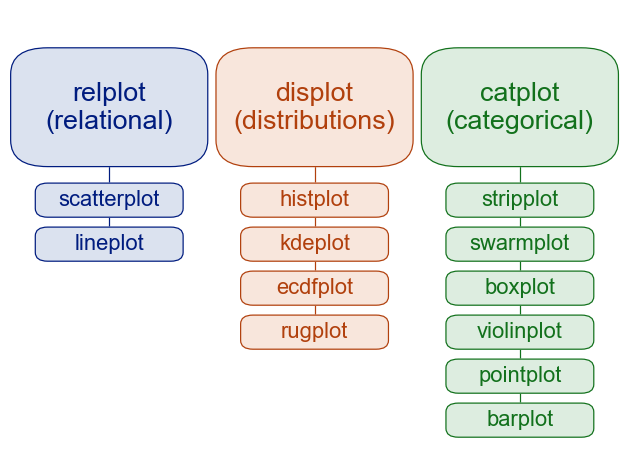

Quelle: [Link](https://seaborn.pydata.org/tutorial/function_overview.html)

Das Bild zeigt die 3 verschiedenen Kategorien von Plots:
* Relational: Zusammenhang bzw. Beziehung zwischen verschiedenen Variablen (Zahlenwerten)
* Distribution: welche Werte ein Features annehmen kann (Zahlenwerten)
* Categorical: Plots für kategorische Werte. Kategorische Variablen sind Variablen, die nur einen Wert aus einer definierten Menge haben können (bspw. Farben: rot, grün, ...)

Welche Werte werden geplottet? 
* Zahlen (Ganzzahlen, Reelle Zahlen)
* Kategorische Variablen

### Relational Plots

#### Scatterplot



Scatterplots eignen sich für Untersuchungen zwischen Zahlen, bspw. engine_size vs. prize.

Die Doku für Scatterplot finden wir [hier](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) folgendes:
seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)

sowie diesen Auszug der Detaillierung:

Parameters
x, y : vectors or keys in data Variables that specify positions on the x and y axes.

hue: vector or key in data Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

data: pandas.DataFrame, numpy.ndarray, mapping, or sequence Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

In [8]:
plt.figure(figsize=(16, 6)) #change size of plots

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

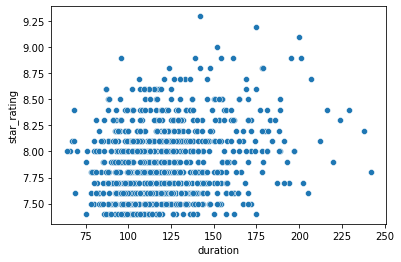

In [9]:
ax = sns.scatterplot(y="star_rating", x="duration", data= IMDB_df)

### Verteilungen

#### Histogram

Schauen wir uns die Verteilung der Top-Filme auf die einzelnen IMBD-Ratings an mittels eines sogenannten Histograms. 

Text(0.5, 1.0, 'Star Rating in absolute values')

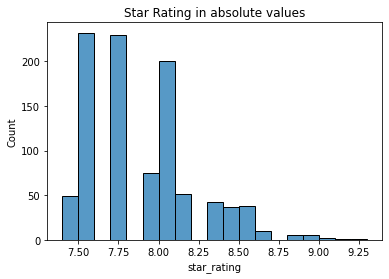

In [16]:
ax = sns.histplot(x="star_rating", data= IMDB_df)
ax.axes.set_title("Star Rating in absolute values")

Text(0.5, 1.0, 'Star Rating in Percentage')

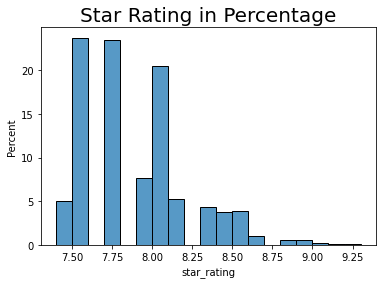

In [18]:
ax = sns.histplot(x="star_rating", data= IMDB_df, stat="percent") # durch den letzten Parameter sehen wir Prozentwerte statt absoluter Werte
ax.axes.set_title("Star Rating in Percentage", fontsize=20)
#ax.set_yticklabels(ax.get_yticks(), size = 12, rotation=30)

#### KDEPlot

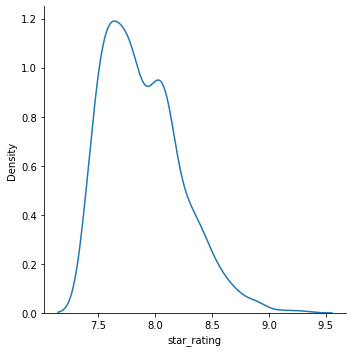

In [19]:
ax = sns.displot(data=IMDB_df, x="star_rating", kind="kde")

Dies ist ein Text